# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
#importing some useful packages
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tqdm import tqdm
import math
import random
from sklearn.utils import shuffle

In [2]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'traffic-signs-data/train.p'
testing_file = 'traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']
print ('Data loaded')

Data loaded


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [3]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[1:]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.bincount(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)
label_distribution = np.bincount(y_train)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

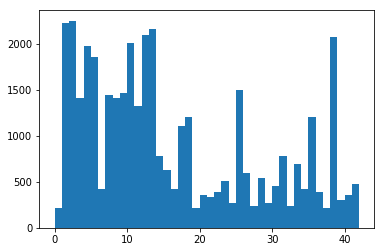

In [4]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.

# Visualizations will be shown in the notebook.
%matplotlib inline

plt.hist(y_train, bins=range(n_classes))
plt.show()
label_distribution = np.bincount(y_train)

class = 26


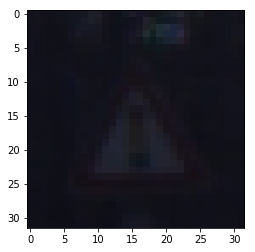

In [5]:
n = random.randint(0, len(X_train))
plt.imshow(X_train[n])
print("class =", y_train[n])


As we can see in the histogram our data is very unequally distributed.

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [6]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.
    
def randomize(dataset, labels):
  
    permutation = np.random.permutation(labels.shape[0])
    shuffled_dataset = dataset[permutation,:,:]
    shuffled_labels = labels[permutation]
    return shuffled_dataset, shuffled_labels


def normalize_rgb(dataset):
    """
    Normalize the image data with Min-Max scaling to a range of [-1, 1]
    :param image_data: The image data to be normalized
    :return: Normalized image data
    """
    out = np.empty(shape=dataset.shape)
    
    a = -1
    b = 1
    rgb_min = 0
    rgb_max = 255
    
    # I am not yet an expert on numpy :-) is there a more elegant wat trwrite this nested loop????
    for i in range(len(dataset)):
        for j in range(dataset[i].shape[2]):
            out[i,:,:,j] = a + ( ( (dataset[i,:,:,j] - rgb_min)*(b - a) )/( rgb_max - rgb_min ) )
    
    return out


def process(dataset, labels):
    """Normalizes the RGB values and randomize data """
    
    dataset = normalize_rgb(dataset)
    
    return randomize(dataset, labels)


X_train, y_train = process(X_train, y_train)
X_test, y_test = process(X_test, y_test)

class = 6


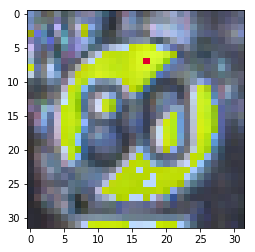

In [7]:

# check processed images
n = random.randint(0, len(X_train))
plt.imshow(X_train[n])
print("class =", y_train[n])

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

**Normalize RGB values**

Pixel values often lie in the [0, 255] range. Feeding these values directly into a network may lead to numerical overflows.
It also turns out that some choices for activation and objective functions are not compatible with all kinds of input. The wrong combination results in a network doing a poor job at learning.
Imagine using sigmoid activation functions in your network. Multiplying your weights with pixel values of large magnitudes will force the neuron to saturate.

**Shuffle Data**

Our Data comes in a format that is ordered by lablel. So I unison shuffle images and labels. I repeat the randomization in every epoch.

Training set (38032, 32, 32, 3) (38032,)
Validation set (1177, 32, 32, 3) (1177,)
Test set (12630, 32, 32, 3) (12630,)


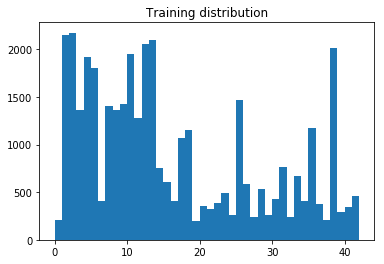

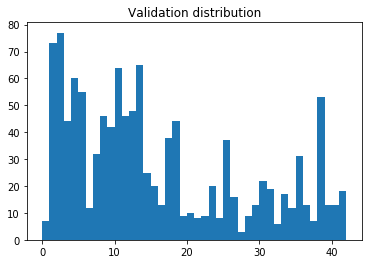

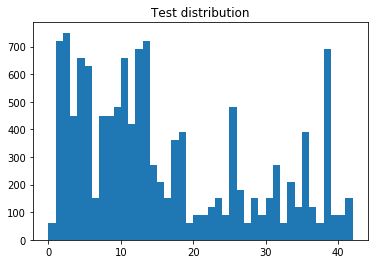

In [8]:
### Generate additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

# split training data into train/validation data
X_train, X_valid, y_train, y_valid  = train_test_split(
    X_train, y_train, test_size=0.03, random_state=42)

print('Training set', X_train.shape, y_train.shape)
print('Validation set', X_valid.shape, y_valid.shape)
print('Test set', X_test.shape, y_test.shape)

# check weather our different datasets follow the same distribution
plt.hist(y_train, bins=range(n_classes))
plt.title('Training distribution')
plt.show()

plt.hist(y_valid, bins=range(n_classes))
plt.title('Validation distribution')
plt.show()

plt.hist(y_test, bins=range(n_classes))
plt.title('Test distribution')
plt.show()


### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

I used train_test_split from sklearn to create a validation set from our training data. I chose a relatively small validation set because our training data is very limited. I use 1177 datapoints for validation. This is almost the size of our test set. So I think we are fien considering that we are working with a a small overall dataset.
I made sure our different datasets follow the same label distribution.

In [9]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

from tensorflow.contrib.layers import flatten

# Parameters
rate = 0.01
EPOCHS = 25
BATCH_SIZE = 512

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
    
    # Activation.
    conv1 = tf.nn.relu(conv1)
    
    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # Activation.
    conv2 = tf.nn.relu(conv2)

    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Flatten. Input = 5x5x16. Output = 400.
    fc0 = flatten(conv2)
    
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # Activation.
    fc1    = tf.nn.relu(fc1)

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # Activation.
    fc2    = tf.nn.relu(fc2)

    # Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, n_classes), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(n_classes))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

## Features and Labels


`x` is a placeholder for a batch of input images.

`y` is a placeholder for a batch of output labels.



In [10]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)

## Training Pipeline

In [11]:
logits = LeNet(x)
softmax = tf.nn.softmax(logits)
labels = tf.argmax(logits, 1)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

## Model Evaluation

In [12]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

### Input
My model architectur is very similar to the LeNet architecture. It accepts a 32x32x3 image as input, where the last dimesion is the number of color channels (RGB). 

### Architecture
**Layer 1: Convolutional.** 
* batchsize: 5x5  
* stride: 1x1 
* padding: Valid 
* output shape: 28x28x6


**Activation.** 
* Relu.

**Max Pooling.** 
* kernelsize: 2x2
* strides:  2x2, 
* padding:VALID
* output shape: 14x14x6

**Layer 2: Convolutional.** 
* batchsize: 5x5  
* stride: 1x1 
* padding: Valid 
* output shape: 10x10x16

**Activation.**
* Relu

**Max Pooling.** 
* kernelsize: 2x2
* strides:  2x2, 
* padding:VALID
* output shape: 5x5x16

**Flatten.** 
* Flatten the output shape of the final pooling layer such that it's 1D instead of 3D. The easiest way to do is by using `tf.contrib.layers.flatten`, which is already imported for you.
* output shape: 400

**Layer 3: Fully Connected.** 
* output shape: 120

**Activation.** 
* Relu

**Layer 4: Fully Connected.** 
* output shape: 84

**Activation.** 
* Relu

**Layer 5: Fully Connected (Logits).** 
* output shape: 43

### Output
Return the result of the 2nd fully connected layer.

## Train the Model
Run the training data through the training pipeline to train the model.

Before each epoch, shuffle the training set.

After each epoch, measure the loss and accuracy of the validation set.

Save the model after training.

In [13]:
### Train your model here.
### Feel free to use as many code cells as needed.

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for epoch_i in range(EPOCHS) :
        X_train, y_train = shuffle(X_train, y_train)
        
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(epoch_i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.381

EPOCH 2 ...
Validation Accuracy = 0.670

EPOCH 3 ...
Validation Accuracy = 0.765

EPOCH 4 ...
Validation Accuracy = 0.792

EPOCH 5 ...
Validation Accuracy = 0.823

EPOCH 6 ...
Validation Accuracy = 0.850

EPOCH 7 ...
Validation Accuracy = 0.872

EPOCH 8 ...
Validation Accuracy = 0.864

EPOCH 9 ...
Validation Accuracy = 0.863

EPOCH 10 ...
Validation Accuracy = 0.860

EPOCH 11 ...
Validation Accuracy = 0.867

EPOCH 12 ...
Validation Accuracy = 0.882

EPOCH 13 ...
Validation Accuracy = 0.890

EPOCH 14 ...
Validation Accuracy = 0.882

EPOCH 15 ...
Validation Accuracy = 0.876

EPOCH 16 ...
Validation Accuracy = 0.859

EPOCH 17 ...
Validation Accuracy = 0.879

EPOCH 18 ...
Validation Accuracy = 0.861

EPOCH 19 ...
Validation Accuracy = 0.880

EPOCH 20 ...
Validation Accuracy = 0.884

EPOCH 21 ...
Validation Accuracy = 0.868

EPOCH 22 ...
Validation Accuracy = 0.862

EPOCH 23 ...
Validation Accuracy = 0.870

EPOCH 24 ...
Validation Accura

## Evaluate the Model on the test set

In [14]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.724


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

* EPOCHS: 20
* BATCH_SIZE: 512
* LEARNING RATE: 0.001
* OPTIMIZER: AdamOptimizer

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

* I chose to combine localization and classifying of the traffic sign in a single step. The ConvNet seems to perform well without cropping the image and taking advantage of the bounding box data.

* My architecture is almost identical to LeNet.
Each stage is composed of a (convolutional) filter bank layer, a non-linear transform
layer (Relu), and a spatial feature pooling layer. On top of that I use two fully connected layers with Relus to produce the output logits

* Empirical parameter tuning: I tried different learning rates in the range 0.00001 and 0.1. I did this to make sure my gradient based optimizer is not stuck in a local minimum. I got the best result for a learning rate of 0.01. Further decreasing the learning rate did not lead to better test results but only to a massive increase of epochs needed to sturate the model.

* I chose LeNet-5 Architecture because it  was successfully trained for handwritten digits recognition and tested on the MNIST dataset. Furthermore a similar architecture was successfully used for Croatian Traffic Signs Recognition. Check out the paper [here](http://www.zemris.fer.hr/~ssegvic/pubs/vukotic14ccvw.pdf)


---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [15]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

new_images = []
path = './traffic_signs_new'

for fn in os.listdir(path):
    if fn[0] !='.':
        img_temp = cv2.imread(path+'/'+fn)
        img_temp = cv2.cvtColor(img_temp, cv2.COLOR_BGR2RGB) # BGR to RGB
        img_res = cv2.resize(img_temp, (32,32))
        new_images.append(img_res)

new_images = np.array(new_images)
# Normalize RGB values
new_images = normalize_rgb(new_images)

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



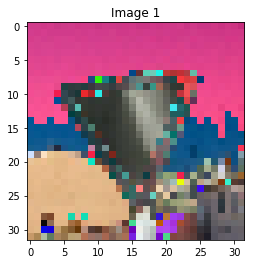

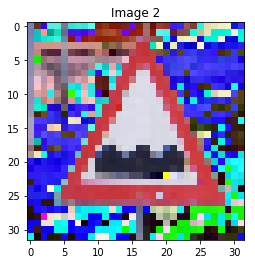

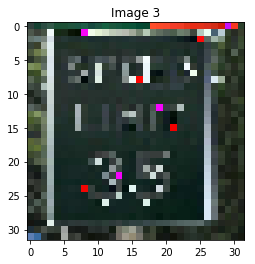

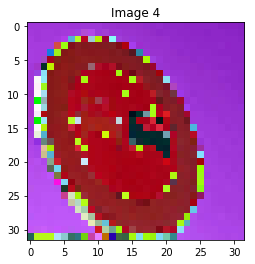

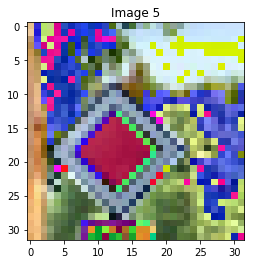

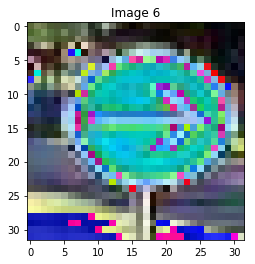

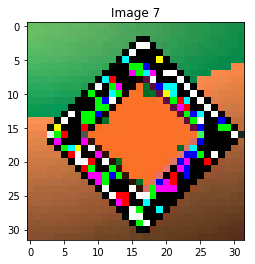

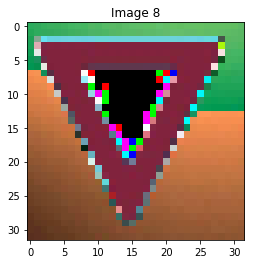

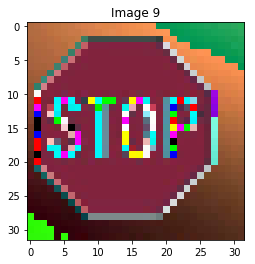

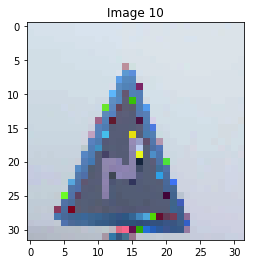

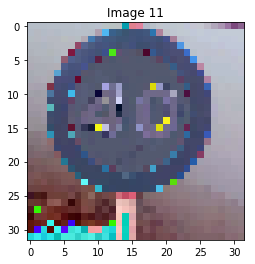

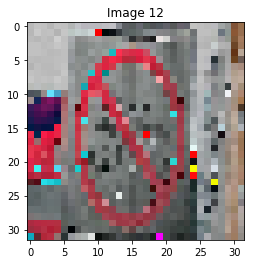

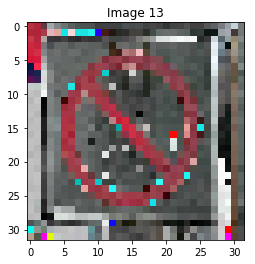

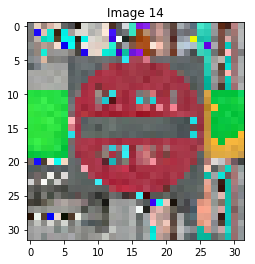

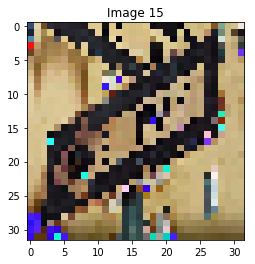

In [16]:
i = 1
for img in new_images:
    plt.figure()
    plt.title('Image '+str(i))
    plt.imshow(img)
    i +=1

**Answer:**

I plotted all images above. Here I will pick 5 and discuss potential classification problems:

* Image 3: language difference. The traffic sign text is in english, we train on german signs
* Image 4:  viewpoint variations, 
* Image 2: type of traffic sign does not exist in german traffic system
* Image 12: low input resolution. The thinner lines are note clearly defined at resolution 32x32
* Image 15: multiple traffic sign in one image



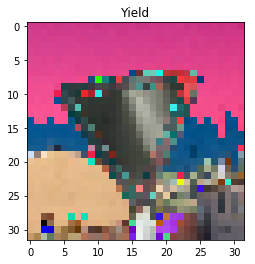

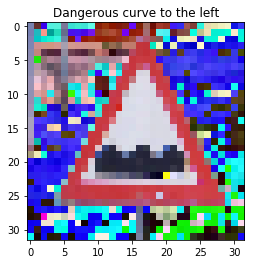

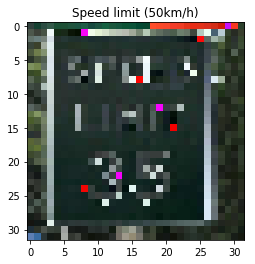

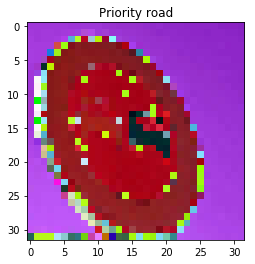

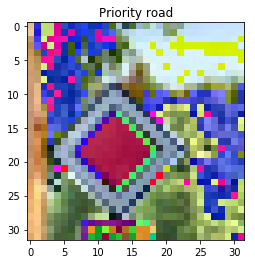

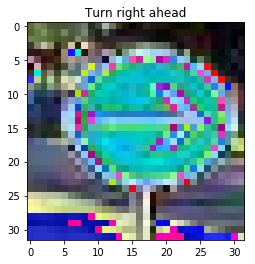

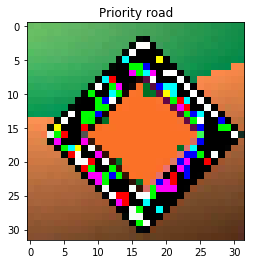

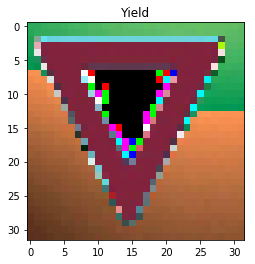

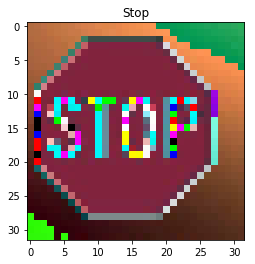

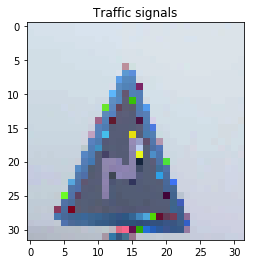

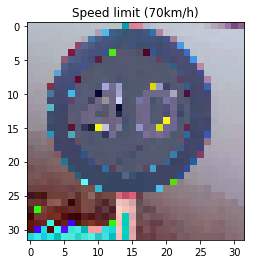

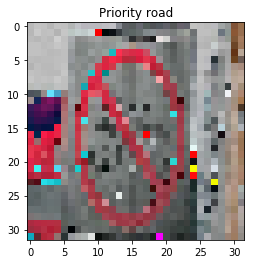

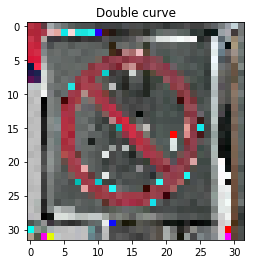

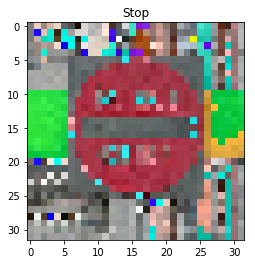

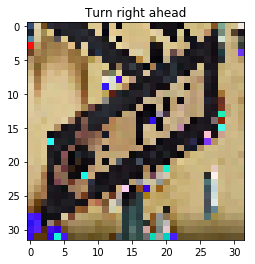

In [17]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

new_images_labels = dict()
new_images_softmax = dict()
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    
    labels = sess.run(labels, feed_dict={x: new_images})
    softmax = sess.run(softmax, feed_dict={x: new_images})
    
    for i in range(len(labels)):
        new_images_labels[i] = labels[i]
    
    for i in range(len(softmax)):
        new_images_softmax[i] = softmax[i]


signnames = pd.read_csv('signnames.csv')

for key, value in new_images_labels.items():
    
    img = new_images[key]
    plt.figure()
    plt.title(signnames['SignName'][value])
    plt.imshow(img)

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**
I checked the predictions manually. My classifier got right 7 out of 15. This gives us an uaccuracy of roughly 47%. Our model performs much worde on the captured pictures.

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**
I plotted the softmax probabilities below. As you can see our classifier is very certain in most cases. Only in Prediction 13 do we find uncertainty. This kind of makes sense because the input image for prediction 13 is very different from all images in our training set. This kinf of traffic sign does not seem to exist in the German traffic system. 

Although our classifier is pretty certain in most of the cases it is simply wrong in a lot of cases. Prediction 1 and Prediction 2 are two obvious cases where our classifier fails with almost absolute certainty.


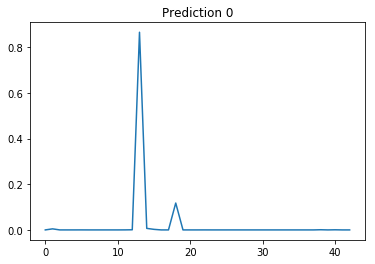

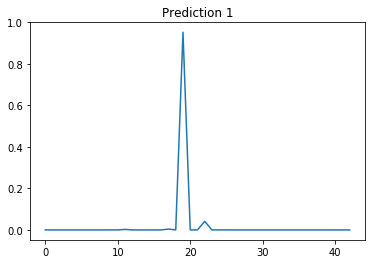

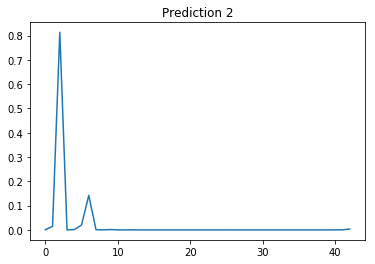

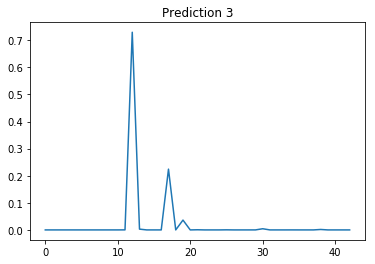

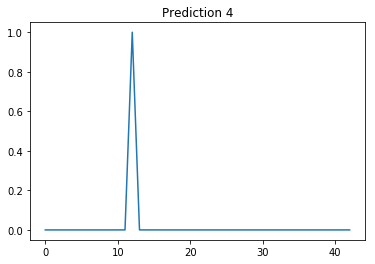

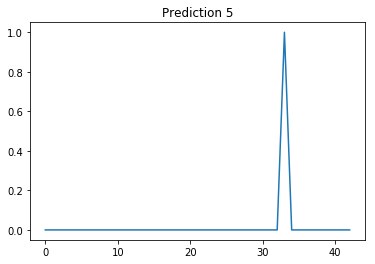

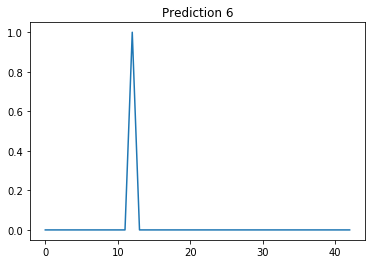

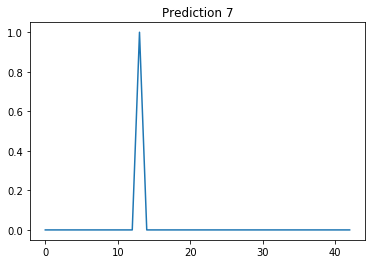

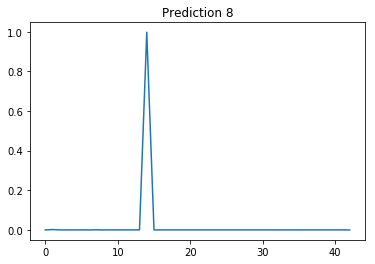

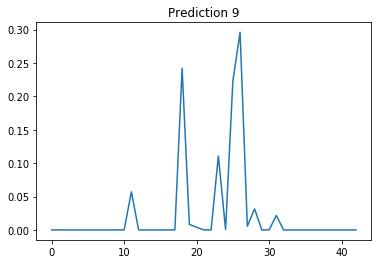

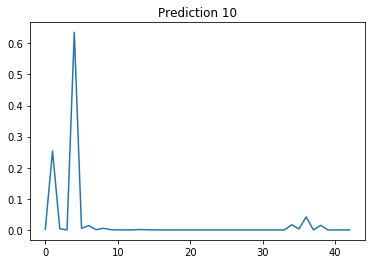

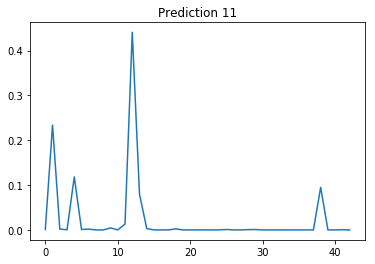

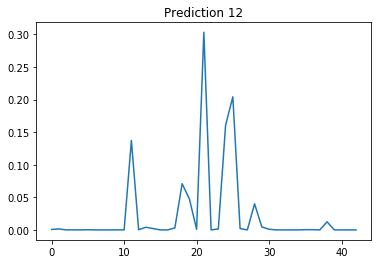

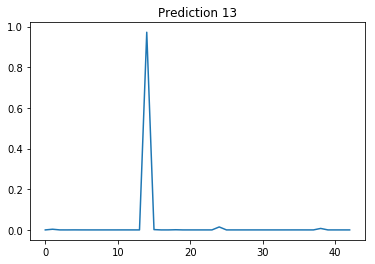

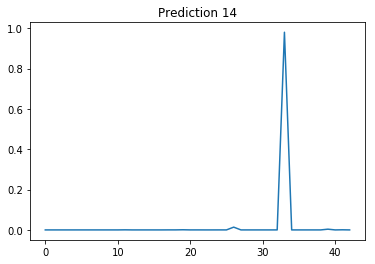

In [18]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

for i in range(len(new_images_softmax)):
    plt.figure()
    plt.title('Prediction '+str(i))
    plt.plot(new_images_softmax[i])
    plt.show()


> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.